# Risk Assessment for Aircraft Purchase

## Introduction

As our company explores new opportunities in the aviation industry, it’s crucial to understand the risks associated with different aircraft. This project will use data science techniques to analyze factors like accident history, maintenance costs, and operational efficiency to provide clear, actionable insights and identify the safest options for the company to start this new business endeavor.

## Objectives

The tasks that will be undertaken are:
- Importing the relevant libraries
- Opening and inspecting the contents of `Aviation data CSV` using pandas dataframes
- Data Cleaning / Identifying and handling missing values
- Data visualization using the `matplotlib` library
- Providing insights and recommendations

### Data Understanding
In this project, we'll work with data from the [National Transportation Safety Board](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) that includes aviation accident data from 1962 to 2023 about civil aviation accidents

### Business Understanding
The questions that are going to be answered for this project are:
1. How do different phases of flight impact the risk levels of aircraft?
2. Over the last few decades, how safe is an airplane?
3. Which airplanes have the highest and lowest accident rates?
4. What is the correlation between the Number of Engines and Injury count?
5. Which aircraft Model has the highest accident count?
6. During which weather conditions did most accidents occur?

### Requirements
#### 1. Load the data with pandas
Create a dataframe `df` and that represent the `AviationData CSV` file. Use pandas methods to inspect the shape and other attributes of the dataframe.
#### 2. Data Preparation
This step involves checking for columns that contain missing values and selecting the relevant methods to handle the missing
data and ensure that the dataset is ready to be used for analysis
#### 3. Answer the business questions

## 1. Load the Data with Pandas

In the cell below, we:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Read the Aviation accident data
In the cell below, load `AviationData.csv` as `df` and look at the first few samples in the dataset to get a feeling of how the data looks like:

In [2]:
df = pd.read_csv('AviationData.csv', encoding='latin-1');
df.head(7).T

C:\Users\Ago\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6
Event.Id,20001218X45444,20001218X45447,20061025X01555,20001218X45448,20041105X01764,20170710X52551,20001218X45446
Investigation.Type,Accident,Accident,Accident,Accident,Accident,Accident,Accident
Accident.Number,SEA87LA080,LAX94LA336,NYC07LA005,LAX96LA321,CHI79FA064,NYC79AA106,CHI81LA106
Event.Date,1948-10-24,1962-07-19,1974-08-30,1977-06-19,1979-08-02,1979-09-17,1981-08-01
Location,"MOOSE CREEK, ID","BRIDGEPORT, CA","Saltville, VA","EUREKA, CA","Canton, OH","BOSTON, MA","COTTON, MN"
Country,United States,United States,United States,United States,United States,United States,United States
Latitude,NaN,NaN,36.9222,NaN,NaN,42.4453,NaN
Longitude,NaN,NaN,-81.8781,NaN,NaN,-70.7583,NaN
Airport.Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airport.Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now you want to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, we inspect the overall `shape` of the dataframe:

In [3]:
num_rows = df.shape[0] #Provides the number of rows in the dataset
num_cols = df.shape[1] #Provides the number of columns in the dataset

print(f"There are {num_rows} rows in the dataset!") #Using string cancatenation to print the number of rows in the dataset
print(f"There are {num_cols} columns in the dataset!") #Using string cancatenation to print the number of columns in the dataset

There are 88889 rows in the dataset!
There are 31 columns in the dataset!


Let's also look at the info printout:

In [4]:
df.info() #Used to print out information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
#Interpretation of the above information:
"""
From the above information, we notice that the dataset has 5 columns which are Numeric / of float datatype
and 26 columns which are of strings datatype.

Over 95% of the columns in the dataset contain missing values and that means that the dataset has to be cleaned
before being used to perform any type of analysis.
"""

'\nFrom the above information, we notice that the dataset has 5 columns which are Numeric / of float datatype\nand 26 columns which are of strings datatype.\n\nOver 95% of the columns in the dataset contain missing values and that means that the dataset has to be cleaned\nbefore being used to perform any type of analysis.\n'

## 2. Data Preparation

The first question that we need to answer here is which are some of the fields that contain missing data?

In [6]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [7]:
df.isnull().mean()*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

### Select the relevant columns to be used in aswering the questions

In [8]:
# Writing code that will only keep the relevant columns to be used in answering our questions
df = df[['Accident.Number',
        'Event.Date',
        'Location',
        'Country',
        'Investigation.Type',
        'Injury.Severity',
        'Registration.Number',
        'Make',
        'Model',
        'Amateur.Built',
        'Number.of.Engines',
        'Total.Fatal.Injuries',
        'Total.Serious.Injuries',
        'Total.Minor.Injuries',
        'Total.Uninjured',
        'Broad.phase.of.flight',
        'Weather.Condition'
        ]]

Inspect the first five entries of the new df

In [9]:
df.head()

,Accident.Number,Event.Date,Location,Country,Investigation.Type,Injury.Severity,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight,Weather.Condition
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Accident,Fatal(2),NC6404,Stinson,108-3,No,1.0,2.0,0.0,0.0,0.0,Cruise,UNK
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Accident,Fatal(4),N5069P,Piper,PA24-180,No,1.0,4.0,0.0,0.0,0.0,Unknown,UNK
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,Accident,Fatal(3),N5142R,Cessna,172M,No,1.0,3.0,NaN,NaN,NaN,Cruise,IMC
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Accident,Fatal(2),N1168J,Rockwell,112,No,1.0,2.0,0.0,0.0,0.0,Cruise,IMC
4,CHI79FA064,1979-08-02,"Canton, OH",United States,Accident,Fatal(1),N15NY,Cessna,501,No,NaN,1.0,2.0,NaN,0.0,Approach,VMC


### Handling missing values
First, we can tackle handling missing values for some of the relevant colums in our newly created `df`. This columns are:
* Number.of.Engines
* Total.Fatal.Injuries
* Total.Serious.Injuries
* Total.Minor.Injuries  
* Total.Uninjured
* Injury.Severity
* Broad.phase.of.flight
* Weather.Condition

For handling the missing values for this columns, I chose to replace the missing values with the `modes` of each of the columns.
This is because the mode represents the most frequently occurring value in a dataset, which can be a reasonable estimate for missing values. Using the mode helps maintain the distribution of the data and avoids introducing bias that might occur with other imputation methods like mean or median, especially in cases where the data is skewed or has outliers.

In [10]:
print(df['Number.of.Engines'].mode())
print(df['Total.Fatal.Injuries'].mode())
print(df['Total.Serious.Injuries'].mode())
print(df['Total.Minor.Injuries'].mode())
print(df['Total.Uninjured'].mode())
print(df['Injury.Severity'].mode())
print(df['Broad.phase.of.flight'].mode())
print(df['Weather.Condition'].mode())

0    1.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    Non-Fatal
dtype: object
0    Landing
dtype: object
0    VMC
dtype: object


In [11]:
# Replace those columns with their above respective modes
df.fillna(value={'Number.of.Engines': 1,
                 'Total.Fatal.Injuries': 0,
                 'Total.Serious.Injuries': 0,
                 'Total.Minor.Injuries': 0,
                 'Total.Uninjured': 0,
                 'Injury.Severity' : 'Non-Fatal',
                 'Broad.phase.of.flight': 'Landing',
                 'Weather.Condition': 'VMC'}, 
          inplace = True)


### Country Counts

The next step will be to check the number of entries for each of the countries that are available in our dataset

In [12]:
df['Country'].value_counts()

United States                    82248
Brazil                             374
Canada                             359
Mexico                             358
United Kingdom                     344
                                 ...  
Cambodia                             1
St Vincent And The Grenadines        1
Gibraltar                            1
Liberia                              1
Pacific Ocean                        1
Name: Country, Length: 219, dtype: int64

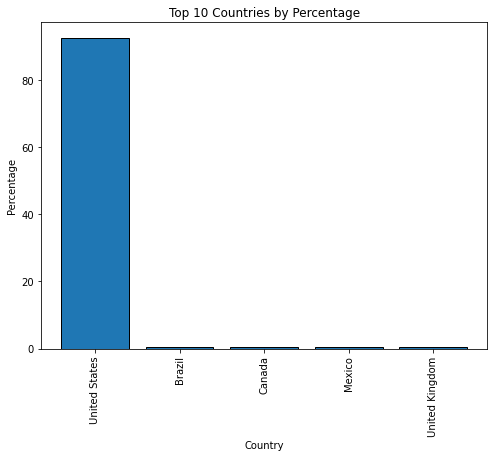

In [13]:
# Calculate the top 5 countries by value counts, normalized to percentage
country_vals = df['Country'].value_counts(normalize=True, dropna=False)[:5] * 100

# Create a bar plot using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(country_vals.index, country_vals.values, edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Top 10 Countries by Percentage')
plt.xticks(rotation=90)
plt.show()

As seen from the visualization above, the United states is the most dominant country in our dataset with over 90% of data, followed by Brazil, Canada, Mexico and United Kingdom.

Because of that, we can choose to let's focus on these accident in the United States with at least one fatality, from data after Jan. 1962.

In [14]:
df['Date'] = pd.to_datetime(df['Event.Date'])
df.drop('Event.Date', axis=1, inplace=True)

df_fatal = df.loc[(df['Total.Fatal.Injuries']>0) &
           (df['Date']>='1962-01') &
           (df['Country'] == 'United States'),
            :]

In [15]:
df_fatal.head()

,Accident.Number,Location,Country,Investigation.Type,Injury.Severity,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight,Weather.Condition,Date
1,LAX94LA336,"BRIDGEPORT, CA",United States,Accident,Fatal(4),N5069P,Piper,PA24-180,No,1.0,4.0,0.0,0.0,0.0,Unknown,UNK,1962-07-19
2,NYC07LA005,"Saltville, VA",United States,Accident,Fatal(3),N5142R,Cessna,172M,No,1.0,3.0,0.0,0.0,0.0,Cruise,IMC,1974-08-30
3,LAX96LA321,"EUREKA, CA",United States,Accident,Fatal(2),N1168J,Rockwell,112,No,1.0,2.0,0.0,0.0,0.0,Cruise,IMC,1977-06-19
4,CHI79FA064,"Canton, OH",United States,Accident,Fatal(1),N15NY,Cessna,501,No,1.0,1.0,2.0,0.0,0.0,Approach,VMC,1979-08-02
6,CHI81LA106,"COTTON, MN",United States,Accident,Fatal(4),N4988E,Cessna,180,No,1.0,4.0,0.0,0.0,0.0,Unknown,IMC,1981-08-01


In [16]:
df_fatal.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,15023.000000,15023.000000,15023.000000,15023.000000,15023.000000
mean,1.165080,2.009452,0.202756,0.146708,0.338548
std,0.417833,5.003558,1.948040,1.850249,6.541899
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000
max,4.000000,265.000000,137.000000,125.000000,334.000000


## Statistical analysis to answer our questions

To answer our questions, we can define a function which takes in the following arguements:
* series      : data series to make a plot on
* title (str) : figure title
* xlabel (str): figure x axis label
* ylabel (str): figure y axis label
* topN (int)  : number of top counts to plot
* figsize (tuple of two integers): figure size width x heigh.

And returns a bar chart which will be used to answer our questions

In [17]:
def plot_value_counts_bar(series, title, xlabel, ylabel, topN=10, figsize=(8,6),):
    
    plt.figure(figsize=(15,10))
    vals = series.value_counts(normalize=True, dropna=False)[:topN]*100
    vals.plot(kind="bar", edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Question 1: How do different phases of flight impact the risk levels of aircraft?

Check the fatal accident and fatality rate during each flight phase usine the above function

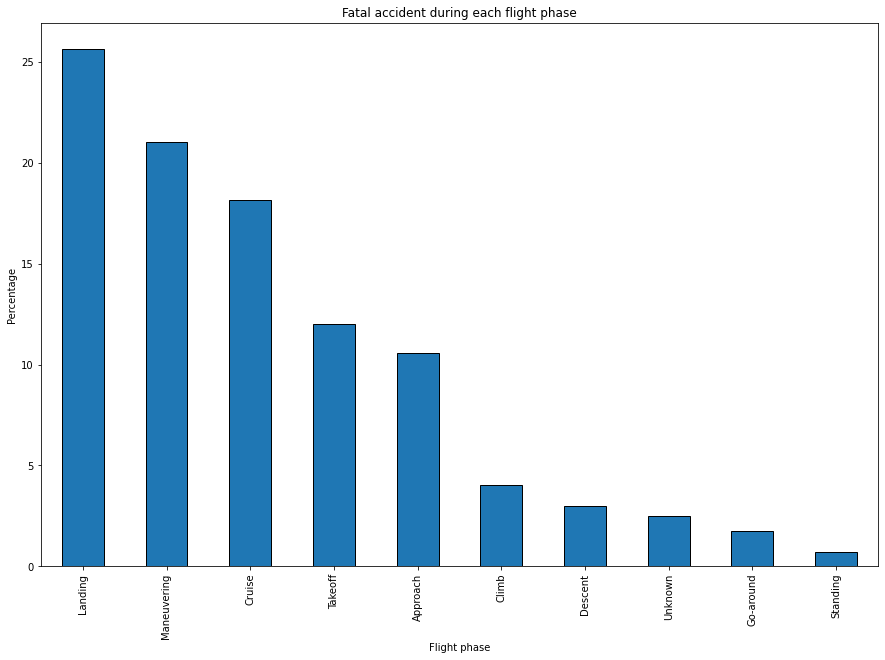

In [18]:
plot_value_counts_bar(series = df_fatal["Broad.phase.of.flight"], 
                      title  = "Fatal accident during each flight phase", 
                      xlabel = "Flight phase", 
                      ylabel = "Percentage" )

### Answer

From the above visualization: It turns out that the most common phase during which fatal accidents occur are during Landing (26%), Maneuvering (21%), cruise (18%), takeoff (12%), and approach (10%). Therefore, `Landing` is the most dangerous flight phase.

 ## Question 2: Over the last few decades, how safe is an airplane?

We can tackle this question by checking the year to year fatality rate

In [19]:
# Extract the year from the Date column in the df_fatal DataFrame and group by the extracted years
# Apply two aggregation functions (sum and count) to the Total.Fatal.Injuries column for each group (year)
# The results are stored in the fatal_agg DataFrame, which will have two columns:
 #one for the sum of fatal injuries and one for the count of incidents per year.
fatal_agg = df_fatal['Total.Fatal.Injuries'].groupby([df_fatal['Date'].dt.year]).agg({'sum','count'})

#Display the first 10 enties of the fatal_agg dataframe
fatal_agg.head(10)

,sum,count
Date,,
1962,4.0,1
1974,3.0,1
1977,2.0,1
1979,1.0,1
1981,4.0,1
1982,1557.0,645
1983,1259.0,654
1984,1198.0,619
1985,1346.0,560


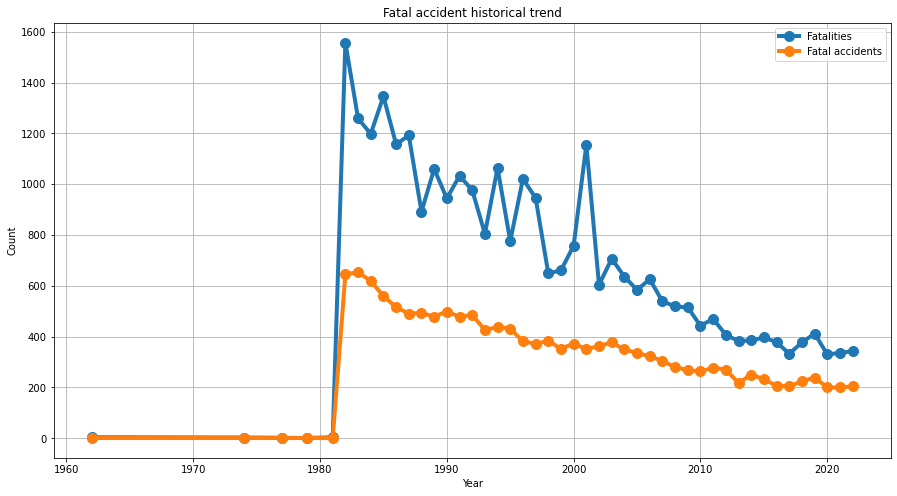

In [20]:
plt.figure(figsize=(15,8))
plt.plot(fatal_agg[['sum','count']], 'o-', lw=4, ms=10 )
plt.legend(('Fatalities', 'Fatal accidents'))
plt.title('Fatal accident historical trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()

From the data above data and visualization, it seems like this data source probably filled in `1` as the count whenever it was unknown, instead of just leaving it as NaN.

Depending on the purpose of the analysis, maybe this would be a useful piece of information, but for our current question, we will go ahead and drop the records where the count is `1`. We'll make a new temporary dataframe `fatal_agg_2` to make sure we don't accidentally delete anything that will be needed in a future question.

In [21]:
fatal_agg_2 = fatal_agg[fatal_agg["count"] != 1].copy()
fatal_agg_2

,sum,count
Date,,
1982,1557.0,645
1983,1259.0,654
1984,1198.0,619
1985,1346.0,560
1986,1157.0,516
1987,1192.0,491
1988,892.0,493
1989,1060.0,479
1990,944.0,499


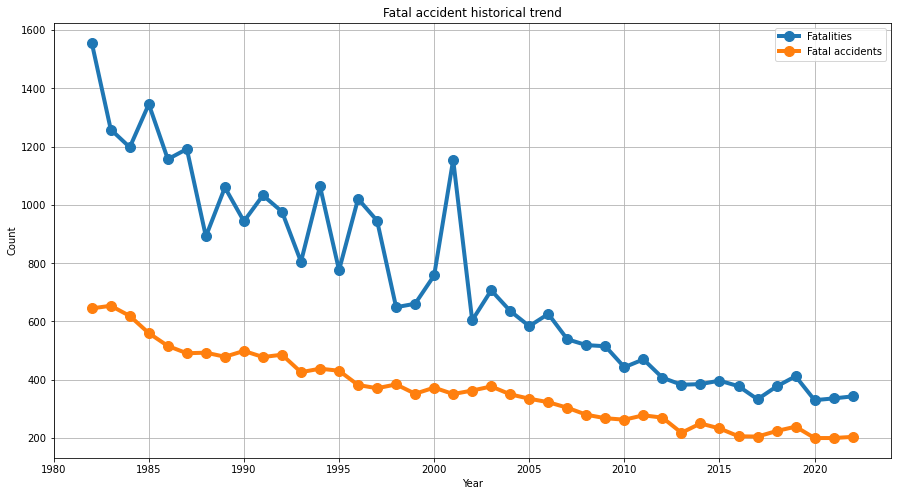

In [22]:
plt.figure(figsize=(15,8))
plt.plot(fatal_agg_2[['sum','count']], 'o-', lw=4, ms=10 )
plt.legend(('Fatalities', 'Fatal accidents'))
plt.title('Fatal accident historical trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()

### Answer: Interpretation of the graph
The graph shows the trends in fatalities and fatal accidents involving airplanes from 1982 to around 2022. Here are the key points:

##### Overall Trend:
* Both the number of fatalities (blue line) and fatal accidents (orange line) have significantly decreased over the last few decades. This suggests a substantial improvement in aviation safety over time.

##### Fatalities:
* In 1982, there were just under 1600 fatalities, but by 2022, this number had dropped to just above 200, therefore the decrease in fatalities indicates that fewer lives are lost in aviation incidents now compared to the past.

##### Fatal Accidents:
* The number of fatal accidents started high near 1982 with about 40 incidents and has decreased to nearly single digits by 2022.
* This reduction shows that the frequency of fatal accidents has also declined.

## Question 3: Which airplane has the highest accident rates?

To answer this question, we are going to use the `'Make'` column whereby we will check for the value counts `i.e` the number of times a specific airplane make was involved in an accident.

In [23]:
vals = df_fatal['Make'].value_counts()
vals.head()

Cessna    3336
Piper     2369
Beech     1154
CESSNA     584
PIPER      424
Name: Make, dtype: int64

Plot the bar graph and normalize it to percentage

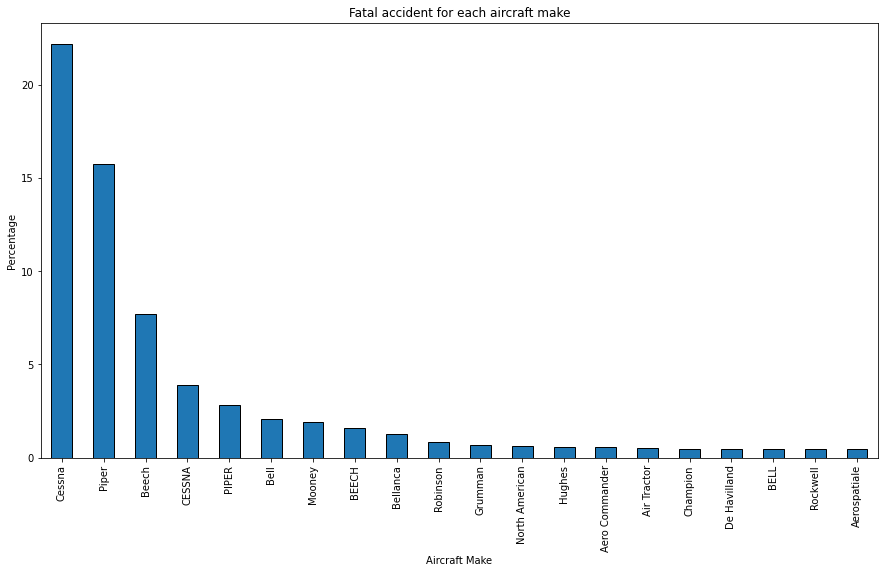

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))

vals = df_fatal["Make"].value_counts(normalize=True, dropna=False)[:20] * 100
ax = vals.plot(kind="bar", edgecolor='black')

plt.title("Fatal accident for each aircraft make") #Adds a title to the figure
plt.xlabel("Aircraft Make") #Adds an x label to the plot
plt.ylabel("Percentage") #Adds a y label to the plot
plt.show() #Displays the plot

Before making an interpretation of the graph above, we notice that some of the makes have been listed twice i.e `CESSNA, PIPER, BEECH` and `BELL` as separate makes. We will therefore go ahead and correct that by applying the strip method.

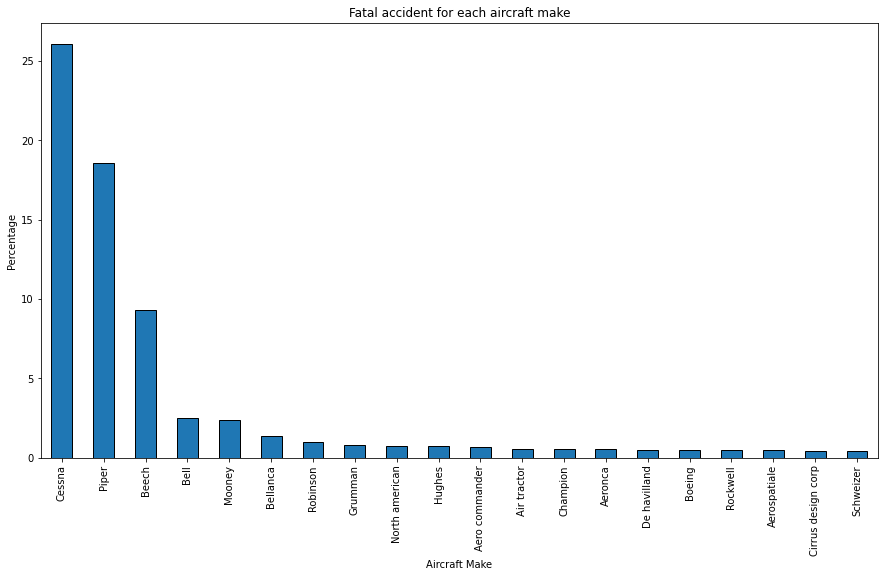

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))

#For the correction, we will use the strip method which is initialized as `str`
#We will also format the Aircraft Make to make only the first letter upper case and the rest lower case
vals = df_fatal["Make"].str.capitalize().value_counts(normalize=True, dropna=False)[:20] * 100
ax = vals.plot(kind="bar", edgecolor='black')

# Adding title and labels and showing the plot
plt.title("Fatal accident for each aircraft make")
plt.xlabel("Aircraft Make")
plt.ylabel("Percentage")
plt.show()

### Answer: Interpretation of the graph
From the visualization above:
* The Cessna make has the highest accident rate, as indicated by the tallest bar on the graph. This suggests that Cessna aircraft have experienced the most fatal accidents compared to other makes.
* The other aircraft makes have significantly lower bars, indicating much lower fatal accident rates. This highlights that Cessna stands out with a notably higher rate of fatal accidents.

## Question 4: What is the correlation between the Number of Engines and Injury count?
To answer this question, we are going to group the DataFrame by 'Number.of.Engines' and count the Injury.Severity for each airplane with a given number of engines.

In [26]:
# Group the DataFrame by 'Number.of.Engines' and count the Injury.Severity for each airplane with a given number of engines.
Survialdf = df.groupby('Number.of.Engines')['Injury.Severity'].size().rename('Injury count').reset_index()
Survialdf

,Number.of.Engines,Injury count
0,0.0,1226
1,1.0,75666
2,2.0,11079
3,3.0,483
4,4.0,431
5,6.0,1
6,8.0,3


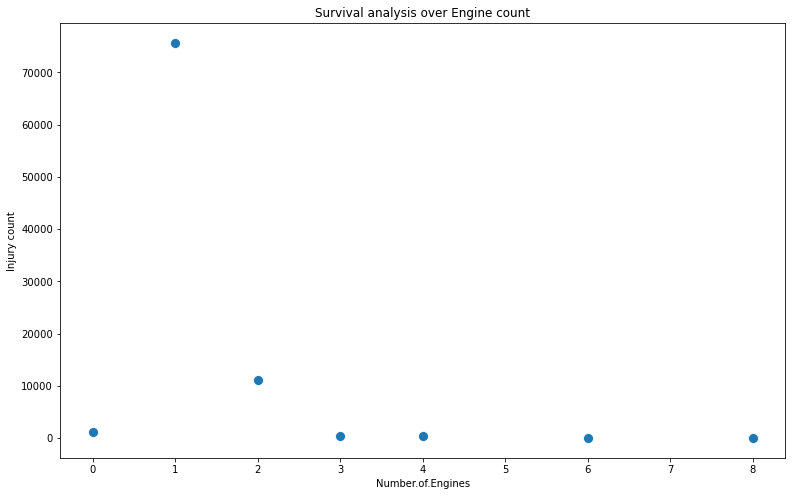

In [27]:
plt.figure(figsize=(13,8))

# Creating a scatter plot with 'Number.of.Engines' on the x-axis and 'Injury count' on the y-axis
sns.scatterplot(data=Survialdf,x='Number.of.Engines',y='Injury count', s=100)

# Adding a title to the plot and displaying it
plt.title('Survival analysis over Engine count')
plt.show()

### Answer: Interpretation of the graph
Based on the scatter plot, there is a negative correlation between the number of engines and the injury count. Aircraft with fewer engines tend to have higher injury counts, while those with more engines tend to have lower injury counts.
Most data points are concentrated at the lower end of both axes, suggesting that aircraft with fewer engines (e.g., 1 or 2 engines) are associated with higher injury counts, while aircraft with more engines (e.g., 3 or more) show significantly fewer injuries.

## Question 5: Which aircraft Model has the highest Accident count?
This question was tackled by creating a new dataframe `Mod_Acc` and grouping the DataFrame `df` by 'Model' and counting the number of accidents for each model

In [33]:
# Grouping the DataFrame by 'Model' and counting the number of accidents for each model
Mod_Acc=df.groupby('Model')['Accident.Number'].size().rename('Accident_count').reset_index()

# Sorting the models by the accident count in descending order and selecting the top 10 models
Top_10_Mod_Acc=Mod_Acc.sort_values('Accident_count',ascending=False).head(10)
Top_10_Mod_Acc

,Model,Accident_count
204,152,2367
263,172,1756
314,172N,1164
8515,PA-28-140,932
175,150,829
312,172M,798
317,172P,689
387,182,659
361,180,622
203,150M,585


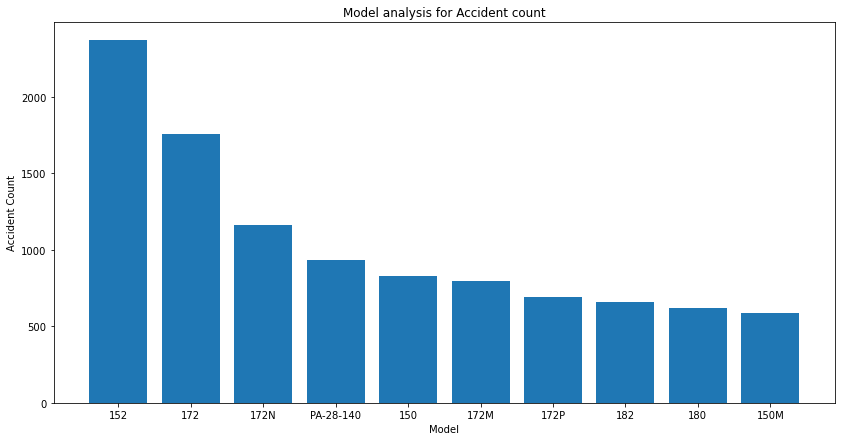

In [29]:
# Setting the figure size for the plot and create a bar chart with 'Model' on the x-axis and 'Accident_count' on the y-axis
plt.figure(figsize=(14,7))
plt.bar(x=Top_10_Mod_Acc['Model'],height=Top_10_Mod_Acc['Accident_count'])

# Adding title and labels
plt.title('Model analysis for Accident count')
plt.xlabel("Model")
plt.ylabel("Accident Count")

# Show the plot
plt.show();

### Answer: Interpretation of the Graph
The graph titled `“Model analysis for Accident count”` shows the accident counts for various aircraft models. Here’s the interpretation to answer the question:

###### Highest Accident Count:
* The aircraft model 152 has the highest accident count, with just over 2000 accidents. This is significantly higher than any other model listed on the graph.

##### Comparison with Other Models:
* Other models such as 172, 172N, PA-28-140, 172M, 172P, 182, and 150M have much lower accident counts in comparison. None of these models come close to the accident count of model 152.

## Question 6: During which weather conditions did most accidents occur?
For the Weather Condition Column, the data source used the following acronyms to mean:
- IMC       : Instrument Meteorological Conditions
- UNK or unk: Unknown
- VMC       : Visual Meteorological Conditions

In [30]:
# Grouping the weather condition and counting the most number of accidents that happened during which weather condition
Weather_Accident=df.groupby('Weather.Condition')['Accident.Number'].size().rename('Accident_count').reset_index()

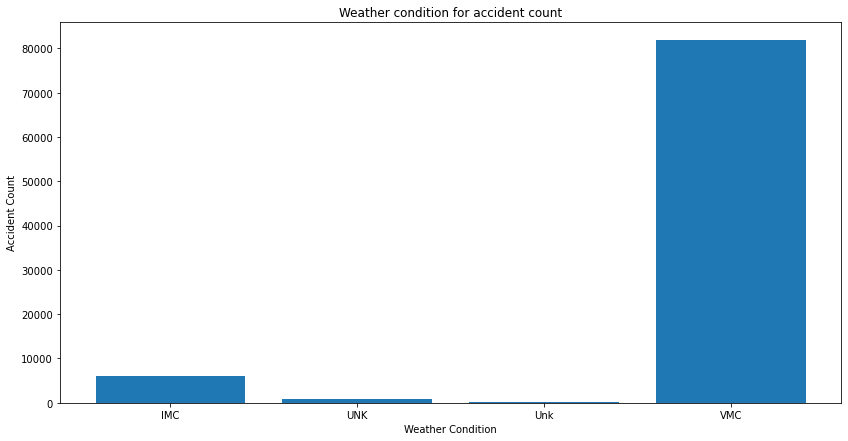

In [31]:
# Ploting the bar chart for highest number accidents over weather condition
plt.figure(figsize=(14,7))
plt.bar(x=Weather_Accident['Weather.Condition'] ,height=Weather_Accident['Accident_count'])

# Adding title and labels
plt.title('Weather condition for accident count')
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")

# Show the plot
plt.show()

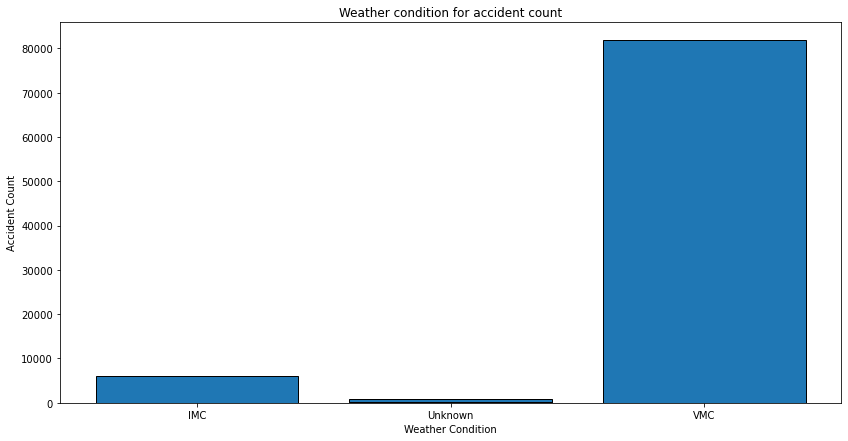

In [32]:
# Combine the two 'Unknown'(UNK) categories
Weather_Accident['Weather.Condition'] = Weather_Accident['Weather.Condition'].replace(['UNK', 'Unk'], 'Unknown')

# Plotting the bar chart for highest number of accidents over weather condition
plt.figure(figsize=(14, 7))
plt.bar(x=Weather_Accident['Weather.Condition'], height=Weather_Accident['Accident_count'], edgecolor='black')

# Adding title and labels
plt.title('Weather condition for accident count')
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")

# Show the plot
plt.show()

### Answer: Interpretation of the graph
* Based on the graph, most accidents occur under Visual Meteorological Conditions (VMC), which might seem counterintuitive as one might expect more accidents in poorer visibility conditions (IMC). This could be due to the higher frequency of flights in VMC compared to IMC.

## Findings:

This article analyzed aviation safety using NTSB data and the following were the findings drawn from the analysis:

1. The most dangerous flight phases in terms of fatalities are `Landing, maneuvering, cruising, takeoff`, and `approach`.

2. Over the years, the number of fatal aviation incidents and the fatality rate have both decreased, indicating a trend towards safer air travel.

3. `Cessna, Piper,` and `Beech` are the most common general aviation aircraft manufacturers, which also makes them the models most frequently involved in fatal accidents.

4. Aircraft with fewer engines tend to have higher injury counts, while those with more engines tend to have lower injury counts.

5. The aircraft model `152` has the highest accident count, making it the model most frequently involved in accidents among those listed.

6. Most accidents occur under Visual Meteorological Conditions (VMC). This could be due to the higher frequency of flights in VMC compared to other weather conditions.

##  Reccomendations:
Based on the findings above, i would reccomend:
1. Invest in aircraft equipped with enhanced navigation systems, automated landing technologies, and robust safety protocols for takeoff and landing.
2. The overall trend towards safer air travel is promising and therefore, continue to prioritize safety by adopting the latest safety standards and technologies.
3. Cessna, Piper, and Beech are the most common manufacturers involved in fatal accidents, therefore, when purchasing new aircraft, first evaluate other manufacturers with strong safety records and comparable performance. 
4. Opt for multi-engine aircraft, especially for longer flights or flights over challenging terrain because multi-engine aircraft provide redundancy and can be safer in the event of an engine failure.
5. While the Cessna 152 model is popular for training, consider diversifying the fleet with other models that have better safety records.
6. Implement rigorous training for pilots to handle unexpected situations even in seemingly safe weather conditions. Invest in advanced weather monitoring and predictive technologies to enhance situational awareness.

# Conclusion:
- In conclusion, the analysis of NTSB data reveals that while aviation safety has improved over the years, certain flight phases and aircraft models remain more prone to accidents. 
- To enhance safety, the company is recommended to invest in airplanes with advanced navigation and landing technologies, prioritize multi-engine aircraft, diversify training fleets, and implement rigorous pilot training and advanced weather monitoring systems. By adopting these measures, the aviation industry can continue to build on the positive trend towards safer air travel.